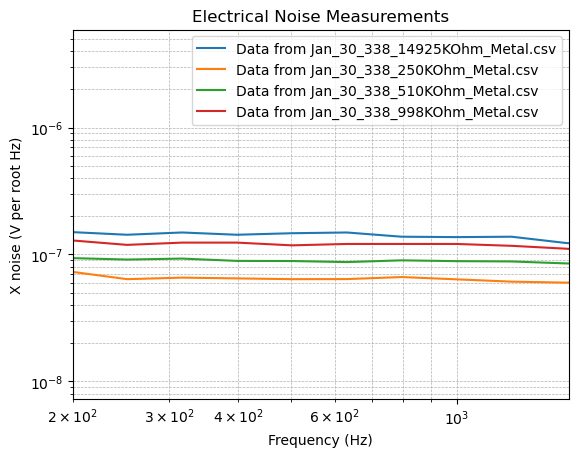

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path where the data files are located
folder_path = r"Jan_30_Clean_Data"

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]
termiator_noise_file = "Jan_30_338_50Ohm_Metal.csv" 

file_path = os.path.join(folder_path, termiator_noise_file)
df = pd.read_csv(file_path)
terminator_noise_data = df['X noise (V per root Hz) - Plot 0']

avg_values = []

# Loop through each CSV file and plot the data
for file in csv_files:

    if (file != termiator_noise_file):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        x_values = df['Frequency (Hz) - Plot 0']
        y_values = df['X noise (V per root Hz) - Plot 0']

        #y_values = np.sqrt(y_values**2 - terminator_noise_data**2)

        avg_values.append(np.average(y_values[15:19]))

        plt.loglog(x_values, y_values, label=f'Data from {file}')


plt.xlabel('Frequency (Hz)')
plt.ylabel('X noise (V per root Hz)')
plt.title('Electrical Noise Measurements')

plt.legend()

# Set log scale for grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')

plt.xlim(200,1600)
plt.show()


In [5]:
avg_values = np.array(avg_values)
avg_values = np.sort(avg_values)

resistances = [250*10**3,510*10**3,998*10**3,1498*10**3]

Slope of the line: 1.394756194750412e-20


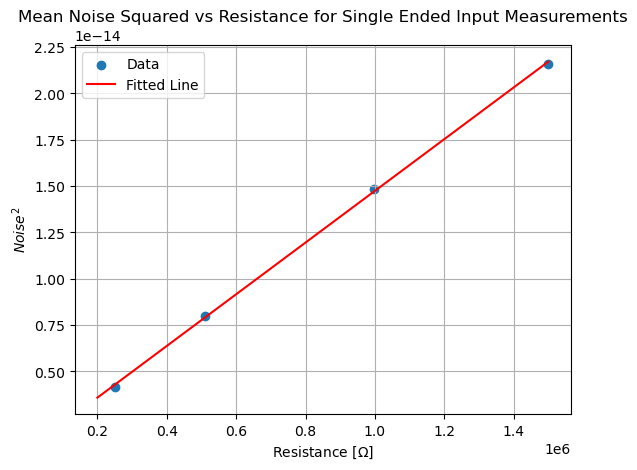

In [12]:
avg_squared = avg_values**2

# Fit a linear regression line (1st-degree polynomial)
coefficients = np.polyfit(resistances, avg_squared, 1)

# The first coefficient represents the slope of the line
slope = coefficients[0]

print("Slope of the line:", slope)

x = np.linspace(200*10**3,1500*10**3)
# Generate predicted values for the fitted line
predicted_y = np.polyval(coefficients, x)

# Plot the data points and the fitted line
plt.scatter(resistances,avg_squared , label='Data')
plt.plot(x, predicted_y, label='Fitted Line', color='red')
plt.xlabel('Resistance [$\Omega$]')
plt.ylabel('$Noise^2$')
plt.legend()
plt.grid(True)
plt.title('Mean Noise Squared vs Resistance for Single Ended Input Measurements')
plt.show()

In [10]:
four_k_t_measured = slope
four_k_t_actual = 4*1.38*10**-23*295.5

percent_error = np.abs((four_k_t_measured - four_k_t_actual) / four_k_t_actual) * 100
print(percent_error)

14.492986908064681


In [11]:
Boltzmann_const = slope/(4*(273+21.6))